## Credit Card Fraud Dataset

# define global variable

In [ ]:
random_state=2024
test_size=0.2
sampling_strategy=1.0

# Import dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape, Dropout,BatchNormalization,Conv1DTranspose,Conv1D,Flatten
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
var_list=data.columns[:-1]

In [ ]:
print(var_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


# data preparation

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=test_size,random_state=random_state)

In [ ]:
print(f"the shape of training dataset is {train.shape}")
print(f"the shape of testing dataset is {test.shape}")

the shape of training dataset is (227845, 31)
the shape of testing dataset is (56962, 31)


In [ ]:
X_train,y_train=train.iloc[:,:-1],train.iloc[:,-1]

In [ ]:
majority_class=train.Class.value_counts()[0]
minority_class=train.Class.value_counts()[1]
print(f"the amount of majority class:{majority_class}")
print(f"the amount of minority class:{minority_class}")

the amount of majority class:227473
the amount of minority class:372


# data normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_sc= scaler.fit_transform(X_train)

## data preparation for builing GANs

In [ ]:
original_data = pd.concat([pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index),pd.DataFrame(y_train, columns=["Class"], index=y_train.index)], axis=1)

In [ ]:
original_data.shape

(227845, 31)

In [ ]:
original_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
147383,0.512095,0.943413,0.776312,0.863190,0.221024,0.766697,0.264568,0.268266,0.784432,0.486253,...,0.559201,0.495795,0.662926,0.307256,0.616975,0.330576,0.410420,0.313123,0.000432,0
65631,0.299076,0.963631,0.751812,0.847940,0.312634,0.758254,0.269756,0.263482,0.789113,0.479524,...,0.568040,0.518510,0.659819,0.336957,0.641756,0.367824,0.416244,0.314993,0.016352,0
240064,0.870486,0.988935,0.768283,0.848299,0.425208,0.761321,0.266732,0.260739,0.787861,0.462406,...,0.561794,0.512975,0.670354,0.378354,0.603752,0.395020,0.416985,0.312753,0.001017,0
208351,0.793335,0.945837,0.777154,0.847513,0.238199,0.764101,0.265074,0.264497,0.782515,0.452518,...,0.573204,0.491674,0.669803,0.327391,0.559796,0.407574,0.419697,0.315687,0.001837,0
103165,0.396598,0.977522,0.767186,0.862121,0.314769,0.758178,0.259192,0.262088,0.785994,0.491495,...,0.560869,0.514959,0.665920,0.480415,0.661053,0.355158,0.417883,0.313981,0.000389,0


In [ ]:
real_data=original_data[original_data["Class"]==1].drop("Class",axis=1)

In [ ]:
real_data.shape

(372, 30)

# construct Vanilla GANs model

## build a GANs model

In [ ]:
n_epochs=100
batch_size=32
random_normal_dimensinos=100
var_num=len(var_list)
generator_num=int(sampling_strategy*majority_class)-minority_class

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(real_data).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import losses

def vanilla_gan(random_normal_dimnsions):

#1.configure generator
  generator=Sequential([
    Dense(128, activation='selu', input_shape=[random_normal_dimensinos]),
    Dropout(0.5),
    BatchNormalization(),

    Dense(256, activation='selu' ),
    Dropout(0.5),
    BatchNormalization(),

    Dense(512, activation='selu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(30, activation='sigmoid'),
    ])

# 2. configure discriminator

  discriminator=Sequential([
    Dense(128, activation=LeakyReLU(0.2), input_shape=(30,)),
    Dropout(0.1),

    Dense(64, activation=LeakyReLU(0.2)),
    Dropout(0.1),

    Dense(32, activation=LeakyReLU(0.2)),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
  ])

  discriminator.compile(optimizer=RMSprop(learning_rate=0.0001),loss=losses.BinaryCrossentropy(),metrics=['accuracy'])
  discriminator.trainable = False

# 3. configure gan
  gan=Sequential([
    generator,
    discriminator
  ])

  gan.compile(optimizer=RMSprop(learning_rate=0.0001),loss=losses.BinaryCrossentropy())

  return gan

def train_vanilla_gan(dataset,batch_size,n_epochs,random_normal_dimensinos):

    gan=vanilla_gan(random_normal_dimensinos)
    generator,discriminator=gan.layers

    dloss=[]
    gloss=[]

    for epoch in range(n_epochs):

    # Initialize variables to store average losses
      generator_loss= 0
      discriminator_loss= 0

      for real in dataset:
        # training phase one; training the discriminator
        noise=tf.random.normal(shape=(batch_size,random_normal_dimensinos))

        fake=generator(noise)
        fake = tf.cast(fake, tf.float64)

        mix_data=tf.concat([real,fake],axis=0)
        discriminatr_labels=tf.concat([tf.ones(batch_size),tf.zeros(batch_size)],axis=0)

        discriminator.trainable=True
        discriminator.train_on_batch(mix_data,discriminatr_labels)

        discriminator_accuracy=discriminator.metrics[0].result()

        #print Discriminator Loss
        discriminator_loss = losses.BinaryCrossentropy()(tf.ones_like(discriminator(real)), discriminator(real))
        discriminator_loss += losses.BinaryCrossentropy()(tf.zeros_like(discriminator(fake)), discriminator(fake))

        #training phase two: training the generator
        noise=tf.random.normal(shape=(batch_size,random_normal_dimensinos))
        generator_labels=tf.ones(batch_size)

        discriminator.trainable=False
        gan.train_on_batch(noise,generator_labels)
        generator_accuracy=gan.metrics[0].result()

        #print Generator Loss
        generator_loss = losses.BinaryCrossentropy()(tf.ones_like(discriminator(fake)), discriminator(fake))


      # Calculate average losses for the epoch
      average_generator_loss = generator_loss/ len(dataset)
      average_discriminator_loss = discriminator_loss / len(dataset)

      # Print epoch summary with average losses
      print(f"Epoch: {epoch+1}, Discriminator Loss: {average_discriminator_loss:.4f}, Generator Loss: {average_generator_loss:.4f}")
      dloss.append(average_discriminator_loss)
      gloss.append(average_generator_loss)

    return generator,dloss,gloss

vanilla_generator,dloss,gloss=train_vanilla_gan(dataset,batch_size,n_epochs,random_normal_dimensinos)


Epoch: 1, Discriminator Loss: 0.1229, Generator Loss: 0.0688
Epoch: 2, Discriminator Loss: 0.1212, Generator Loss: 0.0684
Epoch: 3, Discriminator Loss: 0.1199, Generator Loss: 0.0674
Epoch: 4, Discriminator Loss: 0.1165, Generator Loss: 0.0692
Epoch: 5, Discriminator Loss: 0.1138, Generator Loss: 0.0713
Epoch: 6, Discriminator Loss: 0.1095, Generator Loss: 0.0748
Epoch: 7, Discriminator Loss: 0.1060, Generator Loss: 0.0769
Epoch: 8, Discriminator Loss: 0.1010, Generator Loss: 0.0801
Epoch: 9, Discriminator Loss: 0.0989, Generator Loss: 0.0816
Epoch: 10, Discriminator Loss: 0.0937, Generator Loss: 0.0858
Epoch: 11, Discriminator Loss: 0.0910, Generator Loss: 0.0873
Epoch: 12, Discriminator Loss: 0.0858, Generator Loss: 0.0913
Epoch: 13, Discriminator Loss: 0.0838, Generator Loss: 0.0943
Epoch: 14, Discriminator Loss: 0.0755, Generator Loss: 0.1028
Epoch: 15, Discriminator Loss: 0.0692, Generator Loss: 0.1102
Epoch: 16, Discriminator Loss: 0.0671, Generator Loss: 0.1121
Epoch: 17, Discri

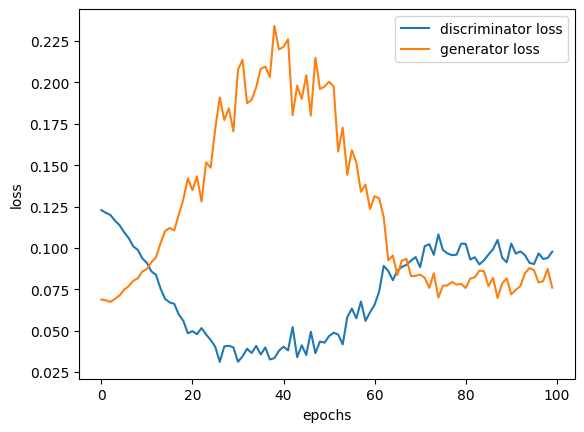

In [ ]:
plt.plot(range(n_epochs),dloss,label="discriminator loss")
plt.plot(range(n_epochs),gloss,label="generator loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## save the GAN model

In [ ]:
vanilla_generator.save('vanilla_generator_'+str(random_state)+'.h5')

## generate Synthetic data

In [ ]:
# generate a batch of noisy input
def sythetic_data(generator,num_dt,random_normal_dimensinos):
  noise=tf.random.normal(shape=(num_dt,random_normal_dimensinos))
  sythetic_data=generator(noise)
  return sythetic_data

vanilla_gan_data=sythetic_data(vanilla_generator,generator_num,random_normal_dimensinos)
vgan_dt=pd.DataFrame(vanilla_gan_data.numpy(),columns=var_list)
vgan_dt["Class"]=np.ones(generator_num)

vgan_train=pd.concat([original_data,vgan_dt],axis=0)
#vgan_train.to_csv("vgan_sampling_"+str(sampling_strategy)+".csv")

SyntaxError: incomplete input (<ipython-input-94-4ac86c797f5b>, line 2)